In [7]:
import pandas as pd
import matplotlib.pyplot as plt   
import geopandas
from shapely.geometry import Point
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [15]:
#Reading in the raw data
uwpd = pd.read_excel(r"C:\Users\joshi\OneDrive\Desktop\Work Stuff\Extra Work & Certifications\Python Work\Joshi_Final_Project\UWPD Data.xls", header = 1,sheet_name='2019')
uwpd.head()

,OFFENSE,MONTH,TIME,LOCATION,OUTCOME
0,SIMPE ASSAULT NO AGGRAVAD,2019-01-01,1:23:38AM,322 W JOHNSON ST,Unfounded
1,INTIMIDATION/STALKING,2019-01-02,5:00:03PM,600 HIGHLAND AV,Cleared by Arrest
2,INTIMIDATION/STALKING,2019-01-03,6:40:00PM,600 HIGHLAND AV,Cleared by Arrest
3,GRAFFITI VANDALISM,2019-01-04,12:00:00AM,640 ELM DR,Open Inactive
4,CRIMINAL DAMAGE,2019-01-04,5:00:00PM,680 N PARK ST,Open Inactive


In [16]:
#Changing the Time column to a datetime object by creating a new column and dropping the old one
uwpd['time'] = pd.to_datetime(uwpd['TIME'])
uwpd.drop('TIME', axis=1, inplace = True)
uwpd['time'] = pd.Series([val.time() for val in uwpd['time']])
uwpd

,OFFENSE,MONTH,LOCATION,OUTCOME,time
0,SIMPE ASSAULT NO AGGRAVAD,2019-01-01,322 W JOHNSON ST,Unfounded,01:23:38
1,INTIMIDATION/STALKING,2019-01-02,600 HIGHLAND AV,Cleared by Arrest,17:00:03
2,INTIMIDATION/STALKING,2019-01-03,600 HIGHLAND AV,Cleared by Arrest,18:40:00
3,GRAFFITI VANDALISM,2019-01-04,640 ELM DR,Open Inactive,00:00:00
4,CRIMINAL DAMAGE,2019-01-04,680 N PARK ST,Open Inactive,17:00:00
...,...,...,...,...,...
478,SIMPE ASSAULT NO AGGRAVAD,2019-12-24,19 UNIVERSITY HOUSES,Cleared by Arrest,11:32:56
479,SIMPE ASSAULT NO AGGRAVAD,2019-12-25,600 HIGHLAND AV,Cleared by Arrest,23:32:37
480,GRAFFITI VANDALISM,2019-12-27,502 WALNUT ST,Open Active,15:25:01
481,GRAFFITI VANDALISM,2019-12-28,640 N PARK ST,Open Active,12:42:12


In [17]:
#Finding all offense names present in data
#Using a set so I do not get repeat entries
all_offenses= uwpd['OFFENSE'].tolist()
all_offenses = set(all_offenses)
all_offenses

{'AGGRAVATED ASSAULT',
 'BURGLARY',
 'CRIMINAL DAMAGE',
 'FONDLING',
 'GRAFFITI VANDALISM',
 'INTIMIDATION/STALKING',
 'KIDNAPPING/ABDUCTION',
 'MOTOR VEHICLE THEFT',
 'RAPE COMPLETED',
 'RESISTING ARREST',
 'ROBBERY',
 'SIMPE ASSAULT NO AGGRAVAD',
 'THEFT ALL OTHER',
 'THEFT BICYCLES',
 'THEFT FROM BLDG',
 'THEFT FROM MV',
 'THEFT MOTOR VEHICLE PRT',
 'THEFT SHOPLIFTING'}

In [18]:
uwpd.rename(columns = {'time':'TIME' }, inplace=True)

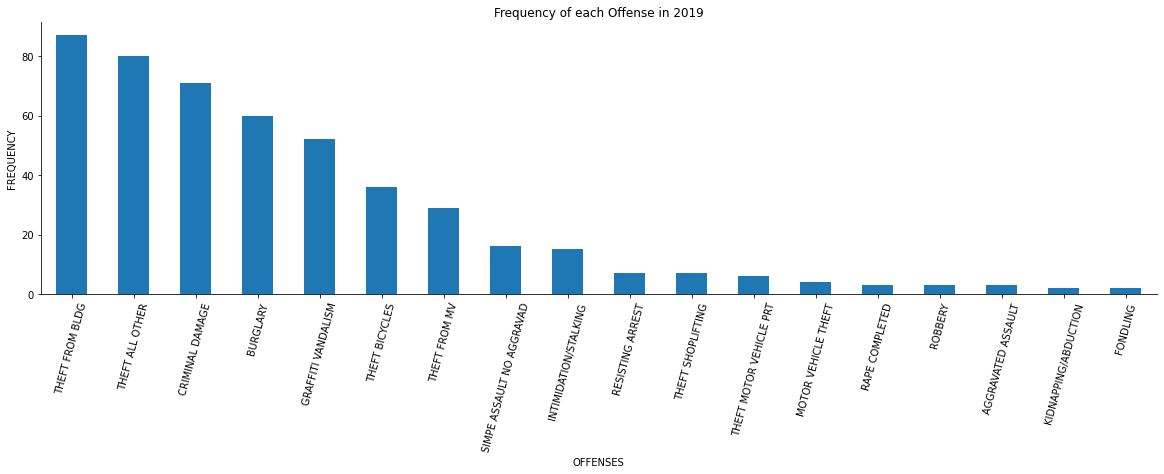

In [19]:
fig, ax = plt.subplots(figsize=(20,5)) 
# Create a histogram of Offense frequency.

uwpd['OFFENSE'].value_counts().plot.bar()
ax.set_ylabel('FREQUENCY') 
ax.set_xlabel('OFFENSES')
ax.set_title('Frequency of each Offense in 2019')
ax.spines['right'].set_visible(False) # get ride of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top
plt.xticks(rotation=75) 
plt.show()

In [20]:
#Renaming column names
uwpd = uwpd.rename(columns = {'OFFENSE': 'Offense', 'MONTH':'Month', 'LOCATION':'Location', 'OUTCOME':'Outcome', 'TIME':'Time'})

#Re-structuring the datetime objects and dropping/renaming columns
uwpd['Month1'] = uwpd['Month'].dt.strftime('%m/%Y')
uwpd = uwpd.drop(['Month'], axis = 1)
uwpd = uwpd.rename(columns = {'Month1': 'Month'})
uwpd

,Offense,Location,Outcome,Time,Month
0,SIMPE ASSAULT NO AGGRAVAD,322 W JOHNSON ST,Unfounded,01:23:38,01/2019
1,INTIMIDATION/STALKING,600 HIGHLAND AV,Cleared by Arrest,17:00:03,01/2019
2,INTIMIDATION/STALKING,600 HIGHLAND AV,Cleared by Arrest,18:40:00,01/2019
3,GRAFFITI VANDALISM,640 ELM DR,Open Inactive,00:00:00,01/2019
4,CRIMINAL DAMAGE,680 N PARK ST,Open Inactive,17:00:00,01/2019
...,...,...,...,...,...
478,SIMPE ASSAULT NO AGGRAVAD,19 UNIVERSITY HOUSES,Cleared by Arrest,11:32:56,12/2019
479,SIMPE ASSAULT NO AGGRAVAD,600 HIGHLAND AV,Cleared by Arrest,23:32:37,12/2019
480,GRAFFITI VANDALISM,502 WALNUT ST,Open Active,15:25:01,12/2019
481,GRAFFITI VANDALISM,640 N PARK ST,Open Active,12:42:12,12/2019


In [21]:
uwpd = uwpd[['Month','Offense','Location','Time','Outcome']]
uwpd

,Month,Offense,Location,Time,Outcome
0,01/2019,SIMPE ASSAULT NO AGGRAVAD,322 W JOHNSON ST,01:23:38,Unfounded
1,01/2019,INTIMIDATION/STALKING,600 HIGHLAND AV,17:00:03,Cleared by Arrest
2,01/2019,INTIMIDATION/STALKING,600 HIGHLAND AV,18:40:00,Cleared by Arrest
3,01/2019,GRAFFITI VANDALISM,640 ELM DR,00:00:00,Open Inactive
4,01/2019,CRIMINAL DAMAGE,680 N PARK ST,17:00:00,Open Inactive
...,...,...,...,...,...
478,12/2019,SIMPE ASSAULT NO AGGRAVAD,19 UNIVERSITY HOUSES,11:32:56,Cleared by Arrest
479,12/2019,SIMPE ASSAULT NO AGGRAVAD,600 HIGHLAND AV,23:32:37,Cleared by Arrest
480,12/2019,GRAFFITI VANDALISM,502 WALNUT ST,15:25:01,Open Active
481,12/2019,GRAFFITI VANDALISM,640 N PARK ST,12:42:12,Open Active


In [22]:
#I'm sure there is a more efficient way to do this
# Wanted to change all dates from MM/YYYY to Strings & find how many incidents where in each month at the same time
# Stored the result in the dictionary
result = {}
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0
count7 = 0
count8 = 0
count9 = 0
count10 = 0
count11 = 0
count12  = 0
for i in range(len(uwpd)):
    if uwpd['Month'][i][0:2] == '01':
        count1+=1
        result['January'] = count1
        
    if uwpd['Month'][i][0:2] == '02':
        count2+=1
        result['February'] = count2
        
    if uwpd['Month'][i][0:2]== '03':
        count3+=1
        result['March'] = count3
        
    if uwpd['Month'][i][0:2] == '04':
        count4+=1
        result['April'] = count4
        
    if uwpd['Month'][i][0:2] == '05':
        count5+=1
        result['May'] = count5 
        
    if uwpd['Month'][i][0:2] == '06':
        count6+=1
        result['June'] = count6
        
    if uwpd['Month'][i][0:2] == '07':
        count7+=1
        result['July'] = count7
        
    if uwpd['Month'][i][0:2] == '08':
        count8+=1
        result['August'] = count8   
        
    if uwpd['Month'][i][0:2] == '09':
        count9+=1
        result['September'] = count9         
        
    if uwpd['Month'][i][0:2] == '10':
        count10+=1
        result['October'] = count10         
        
    if uwpd['Month'][i][0:2] == '11':
        count11+=1
        result['November'] = count11         
        
    if uwpd['Month'][i][0:2]== '12':
        count12+=1
        result['December'] = count12          
        
result

{'January': 31,
 'February': 30,
 'March': 29,
 'April': 50,
 'May': 27,
 'June': 35,
 'July': 42,
 'August': 50,
 'September': 49,
 'October': 57,
 'November': 41,
 'December': 42}

In [23]:
#Same thing but created a new column with default values to store the incident numbers I found above
uwpd['Count'] = 'default'
for i in range(len(uwpd)):
    if uwpd['Month'][i][0:2] == '01':
        uwpd['Month'][i] = 'January'
        uwpd['Count'][i] = 31
        
    if uwpd['Month'][i][0:2] == '02':
        uwpd['Month'][i] = 'February'
        uwpd['Count'][i] = 30

    if uwpd['Month'][i][0:2] == '03':
        uwpd['Month'][i] = 'March'
        uwpd['Count'][i] = 29

    if uwpd['Month'][i][0:2] == '04':
        uwpd['Month'][i] = 'April'
        uwpd['Count'][i] = 50

    if uwpd['Month'][i][0:2] == '05':
        uwpd['Month'][i] = 'May'
        uwpd['Count'][i] = 27

    if uwpd['Month'][i][0:2] == '06':
        uwpd['Month'][i] = 'June'
        uwpd['Count'][i] = 35

    if uwpd['Month'][i][0:2] == '07':
        uwpd['Month'][i] = 'July'
        uwpd['Count'][i] = 42

    if uwpd['Month'][i][0:2] == '08':
        uwpd['Month'][i] = 'August'
        uwpd['Count'][i] = 50

    if uwpd['Month'][i][0:2] == '09':
        uwpd['Month'][i] = 'September' 
        uwpd['Count'][i] = 49

    if uwpd['Month'][i][0:2] == '10':         
        uwpd['Month'][i] = 'October'
        uwpd['Count'][i] = 57

    if uwpd['Month'][i][0:2] == '11':
        uwpd['Month'][i] = 'November'
        uwpd['Count'][i] = 41

    if uwpd['Month'][i][0:2] == '12':
        uwpd['Month'][i] = 'December'
        uwpd['Count'][i] = 42
uwpd

<ipython-input-23-4aac7b9f0d60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uwpd['Count'] = 'default'
C:\Users\joshi\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,Month,Offense,Location,Time,Outcome,Count
0,January,SIMPE ASSAULT NO AGGRAVAD,322 W JOHNSON ST,01:23:38,Unfounded,31
1,January,INTIMIDATION/STALKING,600 HIGHLAND AV,17:00:03,Cleared by Arrest,31
2,January,INTIMIDATION/STALKING,600 HIGHLAND AV,18:40:00,Cleared by Arrest,31
3,January,GRAFFITI VANDALISM,640 ELM DR,00:00:00,Open Inactive,31
4,January,CRIMINAL DAMAGE,680 N PARK ST,17:00:00,Open Inactive,31
...,...,...,...,...,...,...
478,December,SIMPE ASSAULT NO AGGRAVAD,19 UNIVERSITY HOUSES,11:32:56,Cleared by Arrest,42
479,December,SIMPE ASSAULT NO AGGRAVAD,600 HIGHLAND AV,23:32:37,Cleared by Arrest,42
480,December,GRAFFITI VANDALISM,502 WALNUT ST,15:25:01,Open Active,42
481,December,GRAFFITI VANDALISM,640 N PARK ST,12:42:12,Open Active,42


Text(0.5, 1.0, 'Incidents per Month in 2019')

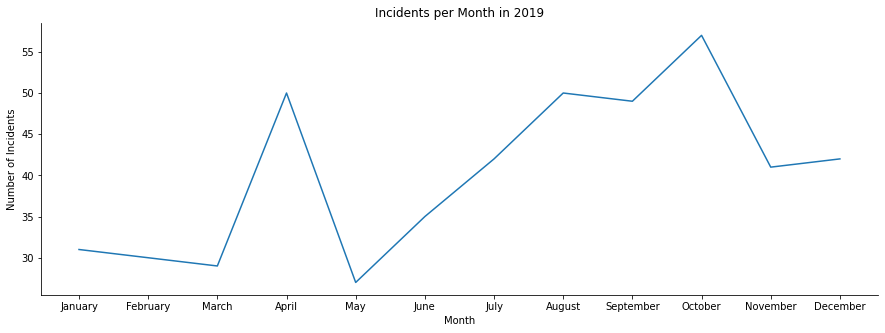

In [24]:
#Plotting the frequency of incidents per month
fig,  ax = plt.subplots(figsize=(15,5))

ax.plot(uwpd['Month'], uwpd['Count'])

ax.set_ylabel("Number of Incidents")
ax.set_xlabel("Month")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Incidents per Month in 2019")


In [25]:
#Taking the top ten locations and finding their frequency of incidents
locations = set(uwpd['Location'])
result = {}
count1=0
count2=0
count3=0
count4=0
count5=0
count6=0
count7=0
count8=0
count9=0
count10=0
for i in range(len(uwpd)):
    if uwpd['Location'][i] == '600 HIGHLAND AV':
        count1+=1
        result['600 Highland Av'] = count1
        
    elif uwpd['Location'][i] == '800 LANGDON ST':
        count2+=1
        result['800 Langdon St'] = count2
        
    elif uwpd['Location'][i] == '610 HIGHLAND AV':
        count3+=1
        result['610 Highland Avenue'] = count3
        
    elif uwpd['Location'][i] == '455 N PARK ST':
        count4+=1
        result['455 N Park St'] = count4
        
    elif uwpd['Location'][i] == '1430 MONROE ST':
        count5+=1
        result['1430 Monroe St'] = count5
    elif uwpd['Location'][i] == '1308 W DAYTON ST':
        count6+=1
        result['1308 W Dayton St'] = count6
    elif uwpd['Location'][i] == '600 N PARK ST':
        count7+=1
        result['600 N Park St'] = count7
    elif uwpd['Location'][i] == '821 W JOHNSON ST':
        count8+=1
        result['821 W Johnson St'] = count8
    elif uwpd['Location'][i] == '615 W JOHNSON ST':
        count9+=1
        result['615 W Johnson St'] = count9  
    elif uwpd['Location'][i] == '770 W DAYTON ST':
        count10+=1
        result['770 W Dayton St'] = count10
    
result

{'600 Highland Av': 48,
 '610 Highland Avenue': 27,
 '800 Langdon St': 30,
 '1308 W Dayton St': 16,
 '1430 Monroe St': 19,
 '821 W Johnson St': 11,
 '455 N Park St': 19,
 '600 N Park St': 15,
 '615 W Johnson St': 9,
 '770 W Dayton St': 9}

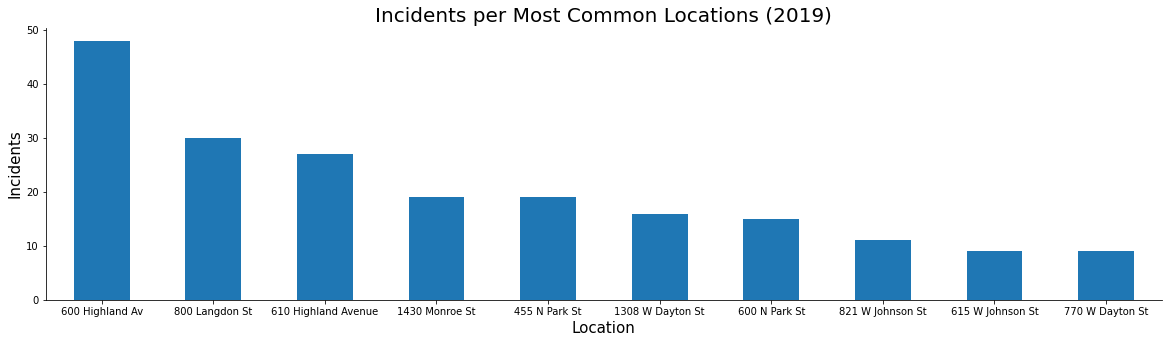

In [26]:
#Created a dataframe to plot the correlation between location and incident level
df = {
    'Location': ['600 Highland Av','800 Langdon St','610 Highland Avenue','1430 Monroe St','455 N Park St',
                 '1308 W Dayton St','600 N Park St','821 W Johnson St','615 W Johnson St','770 W Dayton St'],
    'Incidents': [48,30,27,19,19,16,15,11,9,9]
}

df = pd.DataFrame(df)
ax = df.plot.bar(figsize=(20,5),rot = 0, legend = None, x = "Location")
ax.set_ylabel('Incidents', fontsize = 15)
ax.set_xlabel('Location', fontsize = 15)
ax.set_title('Incidents per Most Common Locations (2019)', fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [27]:
#Creating a dataframe that depicts location and respective longitude/latitude
location = pd.DataFrame({'Location': ['600 Highland Av', '800 Langdon St', '610 Highland Av', '455 N Park St', '1430 Monroe St', '1308 W Dayton St', '600 N Park St', '821 W Johnson St', '615 W Johnson St', '770 W Dayton St'],
                     'Longitude': [-89.42911,-89.39898,-89.42915,-89.40075, -89.41239, -89.407890, -89.401360,-89.39984,-89.39735,-89.39947],
                      'Latitude': [43.077255,43.075844,43.07742,43.062325,43.068066, 43.071850, 43.076660, 43.072075, 43.072014, 43.070934]})
location['Coordinates'] = list(zip(location.Longitude,location.Latitude)) 
location['Coordinates'] = location['Coordinates'].apply(Point)
location 

,Location,Longitude,Latitude,Coordinates
0,600 Highland Av,-89.42911,43.077255,POINT (-89.42910999999999 43.077255)
1,800 Langdon St,-89.39898,43.075844,POINT (-89.39897999999999 43.075844)
2,610 Highland Av,-89.42915,43.077420,POINT (-89.42915000000001 43.07742)
3,455 N Park St,-89.40075,43.062325,POINT (-89.40075 43.062325)
4,1430 Monroe St,-89.41239,43.068066,POINT (-89.41239 43.068066)
5,1308 W Dayton St,-89.40789,43.071850,POINT (-89.40788999999999 43.07185)
6,600 N Park St,-89.40136,43.076660,POINT (-89.40136 43.07666)
7,821 W Johnson St,-89.39984,43.072075,POINT (-89.39984 43.072075)
8,615 W Johnson St,-89.39735,43.072014,POINT (-89.39735 43.072014)
9,770 W Dayton St,-89.39947,43.070934,POINT (-89.39946999999999 43.070934)


In [28]:
#Locking in the coordinates for each location
glocation = geopandas.GeoDataFrame(location, geometry = 'Coordinates')
glocation

,Location,Longitude,Latitude,Coordinates
0,600 Highland Av,-89.42911,43.077255,POINT (-89.42911 43.07726)
1,800 Langdon St,-89.39898,43.075844,POINT (-89.39898 43.07584)
2,610 Highland Av,-89.42915,43.077420,POINT (-89.42915 43.07742)
3,455 N Park St,-89.40075,43.062325,POINT (-89.40075 43.06233)
4,1430 Monroe St,-89.41239,43.068066,POINT (-89.41239 43.06807)
5,1308 W Dayton St,-89.40789,43.071850,POINT (-89.40789 43.07185)
6,600 N Park St,-89.40136,43.076660,POINT (-89.40136 43.07666)
7,821 W Johnson St,-89.39984,43.072075,POINT (-89.39984 43.07207)
8,615 W Johnson St,-89.39735,43.072014,POINT (-89.39735 43.07201)
9,770 W Dayton St,-89.39947,43.070934,POINT (-89.39947 43.07093)


In [36]:
#Downloaded essential information from cityofmadison.com
wisc_map = geopandas.read_file(r"C:\Users\joshi\OneDrive\Desktop\Work Stuff\Extra Work & Certifications\Python Work\Joshi_Final_Project\City_Limit-shp\0168939f-fec2-48f2-8c86-73dea806abf92020329-1-deilff.6mf5b.shp")
wisc_lakes = geopandas.read_file(r"C:\Users\joshi\OneDrive\Desktop\Work Stuff\Extra Work & Certifications\Python Work\Joshi_Final_Project\Lakes_and_Rivers-shp\f5b114cc-178c-4165-bb6a-4164d8b8f7cc2020329-1-1lpyrv8.yndd.shp")
police = geopandas.read_file(r"C:\Users\joshi\OneDrive\Desktop\Work Stuff\Extra Work & Certifications\Python Work\Joshi_Final_Project\Police_Stations-shp\fd8155aa-9bfd-4d5b-be4f-008c8f7880182020329-1-7fwwor.fdxwx.shp")
streets = geopandas.read_file(r"C:\Users\joshi\OneDrive\Desktop\Work Stuff\Extra Work & Certifications\Python Work\Joshi_Final_Project\Street_Centerlines_and_Pavement_Data-shp\f35fc2c9-abe7-419f-9d70-56bf958365ec2020329-1-z8lqni.p66r.shp")

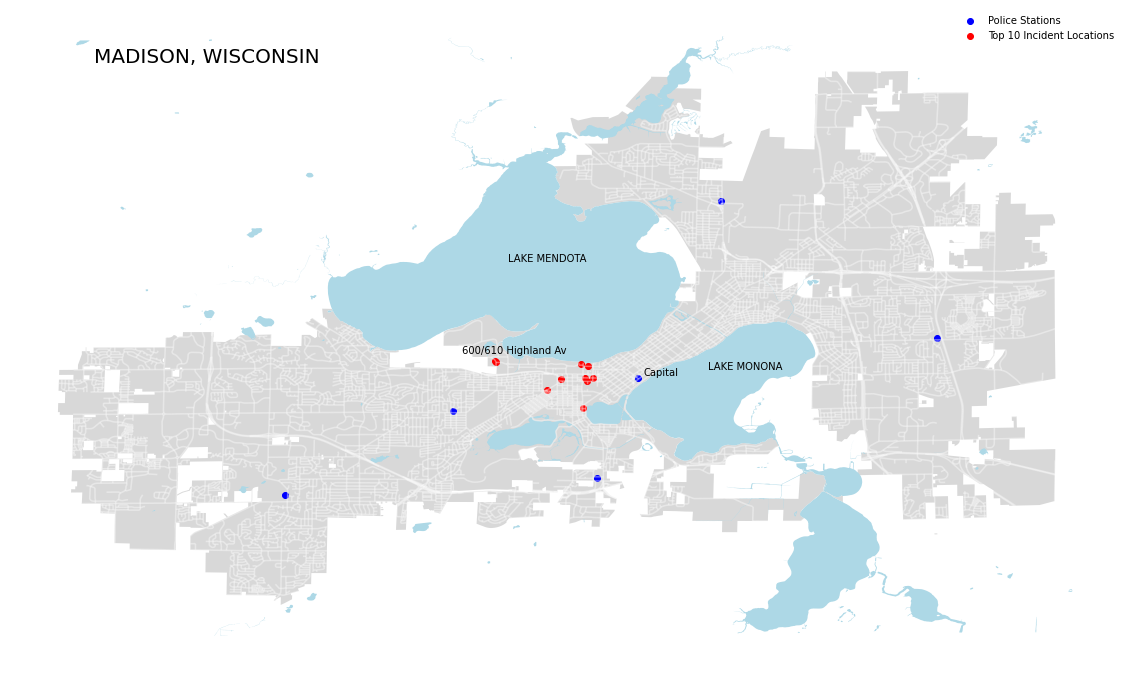

In [39]:
# Here I plotted all the information from the cell above. Re-formatted the colors of the points and streets 
# so everything would be clear and visible properly. I added the 'Capital' landmark to give the viewer
# a sense of direction because the streets are difficult to see. 
# Only added the most 'dangerous' locations because others would have overlapped. 
ax = wisc_map.plot(color='gray', alpha = 0.3, figsize = (20,15))
wisc_lakes.plot(ax=ax, color="lightblue")
streets.plot(ax=ax, color = "white", alpha = 0.4)
police.plot(ax=ax, color = 'blue', label = "Police Stations")
glocation.plot(ax=ax, color = "red", label = "Top 10 Incident Locations")
plt.legend(loc = 'upper right', frameon= False)
ax.text(-89.381,43.073,"Capital")
ax.text(-89.44,43.080,"600/610 Highland Av", fontsize = 10)
ax.text(-89.425,43.110, "LAKE MENDOTA")
ax.text(-89.36,43.075, "LAKE MONONA")
ax.text(-89.56, 43.175, "MADISON, WISCONSIN", fontsize = 20)
ax.set_axis_off()

In [40]:
#Here I attempt to change the datatype of the 'Time' Column to strings 
#so I can then replace the time with values that correspond to that time

uwpd['Time'] = uwpd['Time'].astype(str)
for i in range(len(uwpd)):
    time = uwpd['Time'][i]
    if (uwpd['Time'][i] >= '12:00:00') & (uwpd['Time'][i] <= '17:00:00'):
        uwpd['Time'] = uwpd['Time'].replace(uwpd['Time'][i], "After-Noon (12pm - 5pm)")
    elif (uwpd['Time'][i] >= '18:00:00') & (uwpd['Time'][i] <= '23:00:00'):
        uwpd['Time'] = uwpd['Time'].replace(uwpd['Time'][i], "Evening (6pm - 11pm)")
    elif (uwpd['Time'][i] >= '00:00:00') & (uwpd['Time'][i] <= '4:00:00'):
        uwpd['Time'] = uwpd['Time'].replace(uwpd['Time'][i], "After-Midnight (12am - 4am)")
    elif (uwpd['Time'][i] >= '05:00:00') & (uwpd['Time'][i] <= '10:00:00'):
        uwpd['Time'] = uwpd['Time'].replace(uwpd['Time'][i], "Morning (5am - 10am)")

<ipython-input-40-25e5fc3b2565>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uwpd['Time'] = uwpd['Time'].astype(str)
<ipython-input-40-25e5fc3b2565>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uwpd['Time'] = uwpd['Time'].replace(uwpd['Time'][i], "After-Midnight (12am - 4am)")
<ipython-input-40-25e5fc3b2565>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

Text(0.5, 1.0, 'Number of Incidents Based on Time of Day')

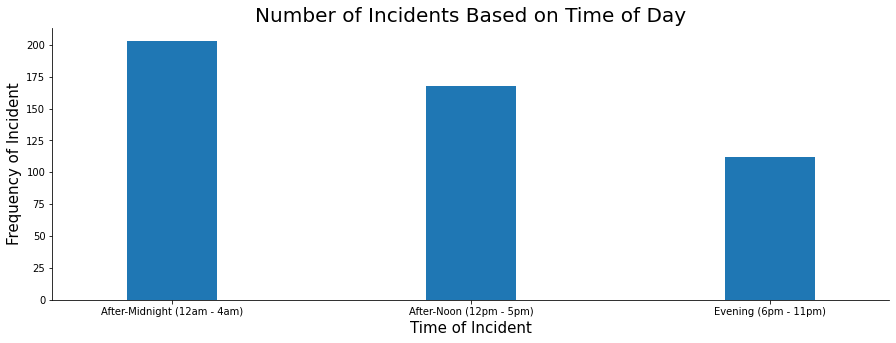

In [41]:
# Plotting the bar-plot that relates frequency of incidents depending on time of day
# No incidents happen in the morning, that's why 5am-10am is missing
fig, ax = plt.subplots(figsize=(15,5))

uwpd['Time'].value_counts().plot.bar(rot = 0, width = 0.3)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Frequency of Incident', fontsize = 15)
ax.set_xlabel('Time of Incident', fontsize = 15)
ax.set_title('Number of Incidents Based on Time of Day', fontsize = 20)